<a href="https://colab.research.google.com/github/Pradeep1023/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
house_df = pd.read_excel('/content/drive/MyDrive/DS - Assignment Part 1 data set.xlsx')

In [ ]:
house_df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [ ]:
house_df.shape

(414, 9)

In [ ]:
# checking duplicate values
house_df.duplicated().sum()

0

In [ ]:
# checking null values
house_df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [ ]:
house_df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [ ]:
# creating new feature House price
house_df['House price'] = house_df['House size (sqft)']*house_df['House price of unit area']

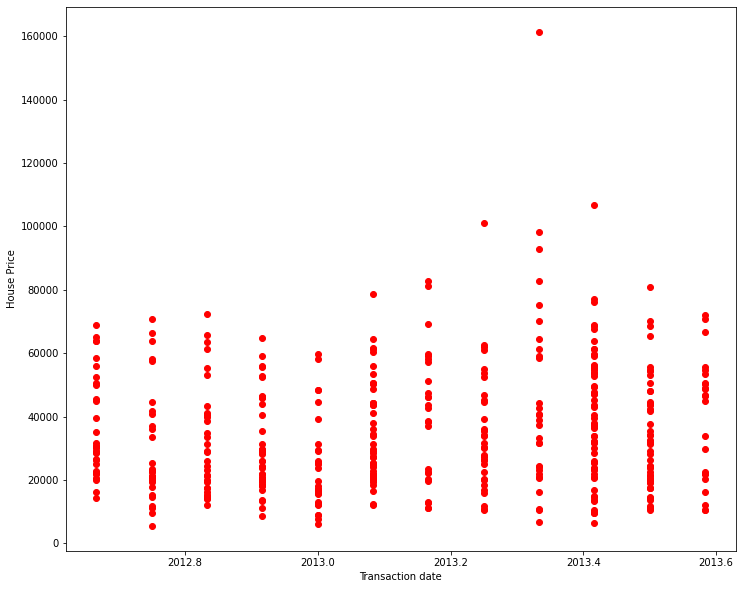

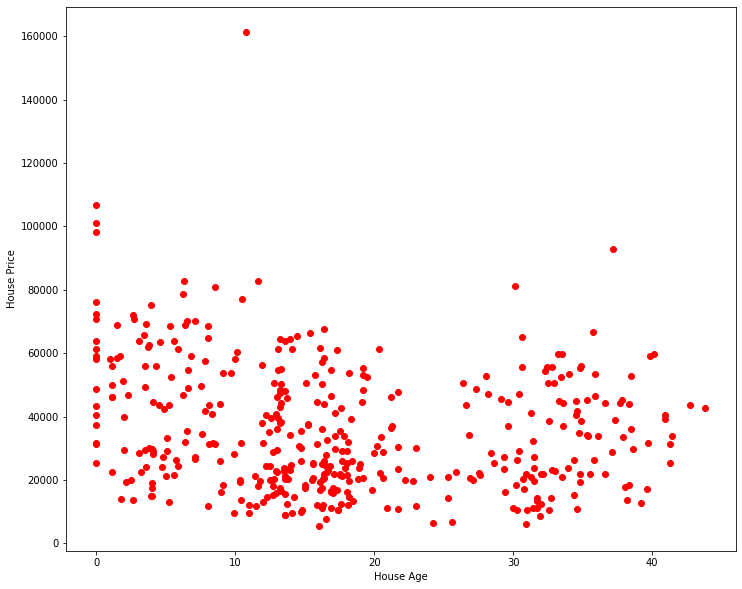

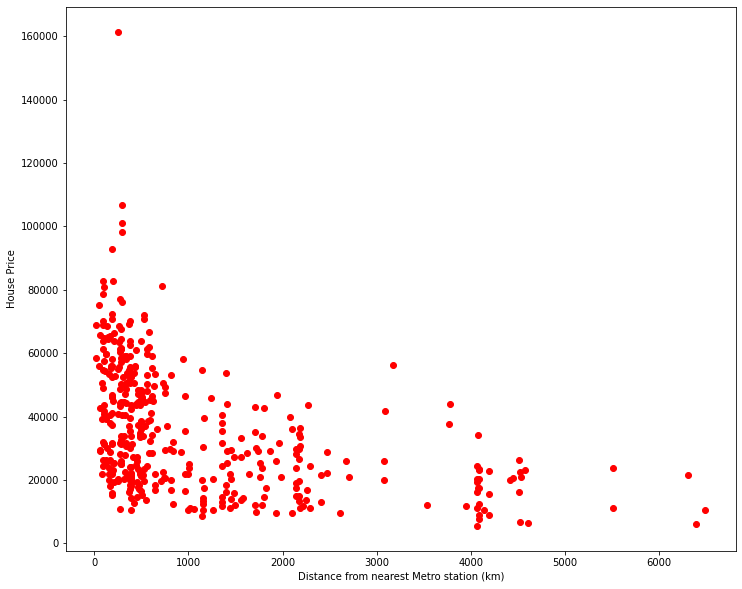

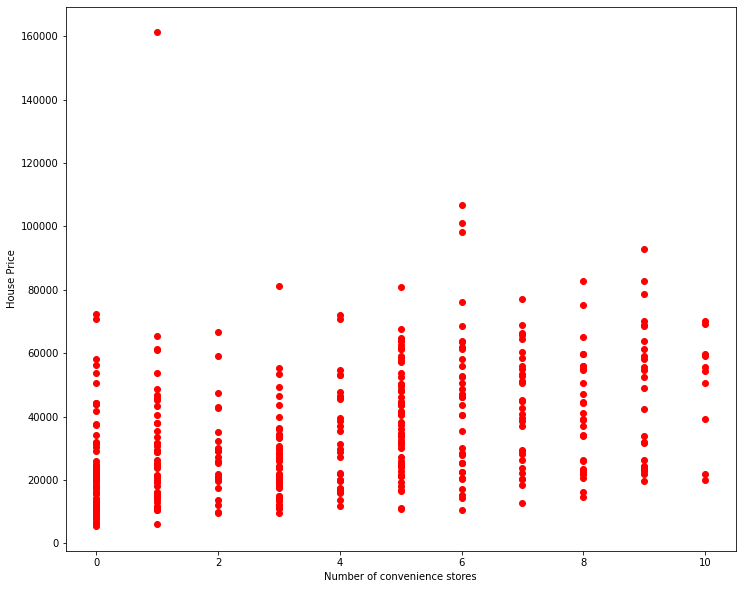

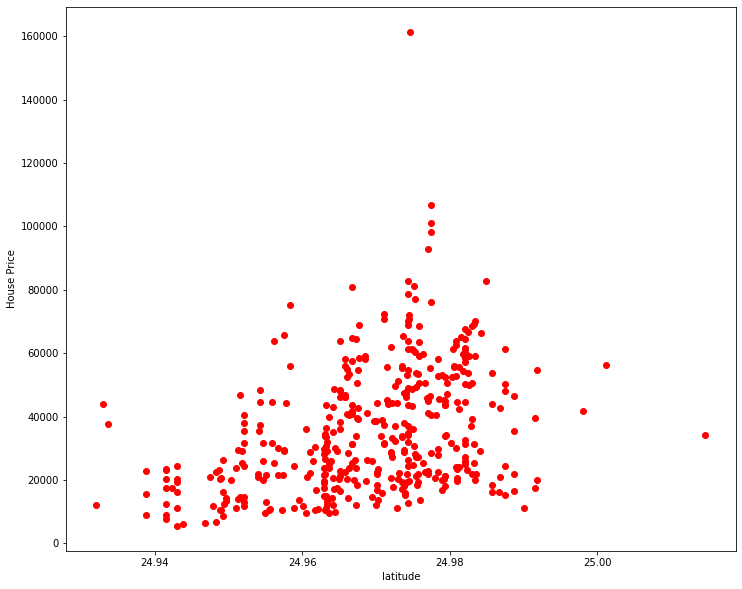

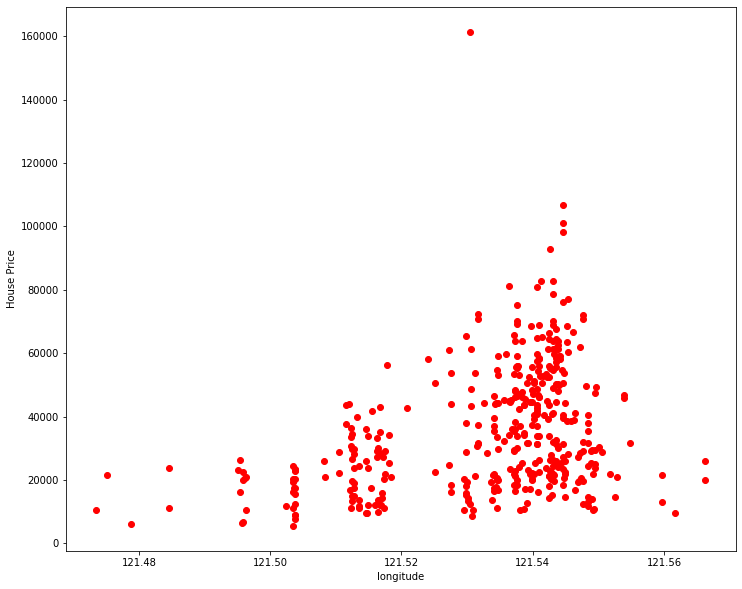

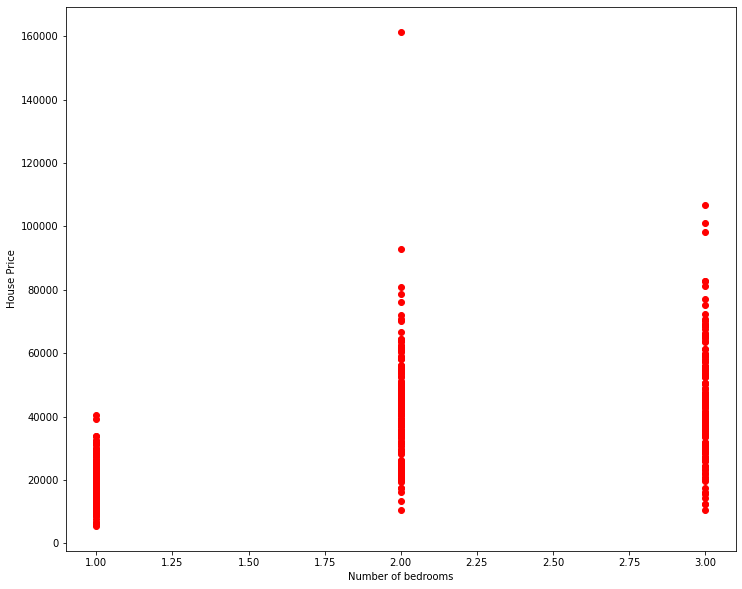

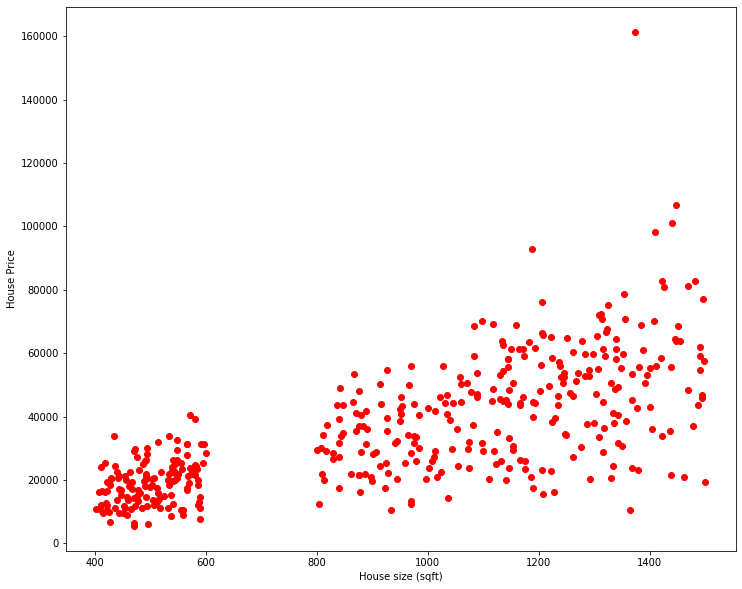

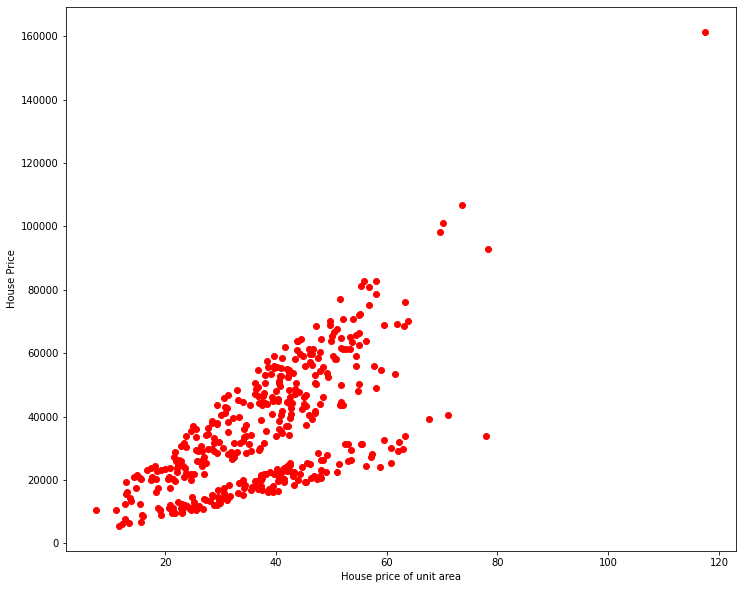

In [ ]:
# plotting scatter plots for different features
for i in house_df.columns[:-1]:
  plt.figure(figsize=(12,10))
  plt.scatter(x = house_df[i],y = house_df['House price'],color='red')
  plt.xlabel(i)
  plt.ylabel('House Price')
  plt.show()



*   We can see most of the houses are new so house age doesn't effect house price that much.
*   House price is high when the distance from the nearest Metro station is less, houses far away from Metro station has lower price.
*   Number of convenience stores has positive relation with house price, higher the number of convenience stores higher the price of house.
*   Houses between 24.96 and 24.98 has higher price.
*   Houses in longitude 121.54 has higher price.
*   Price of the house is higher when the number of bedrooms are more.
*   It's understandable the larger the house(sqft) higher the price of house.






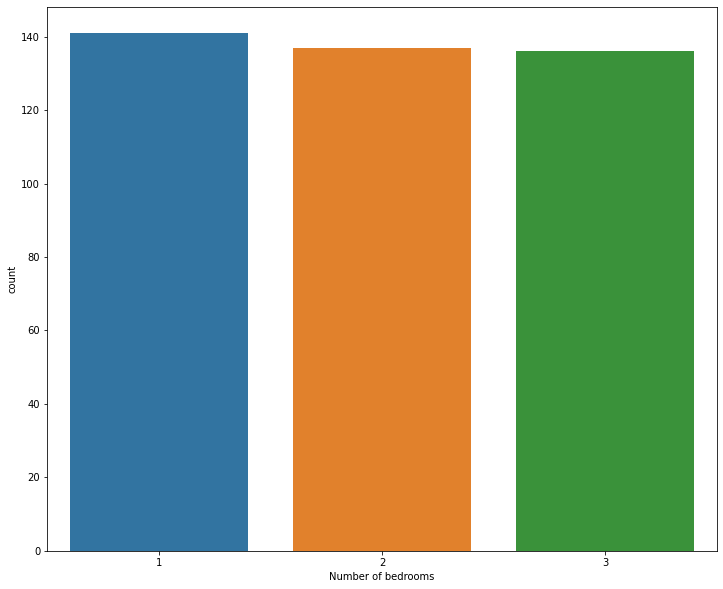

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x=house_df['Number of bedrooms'])

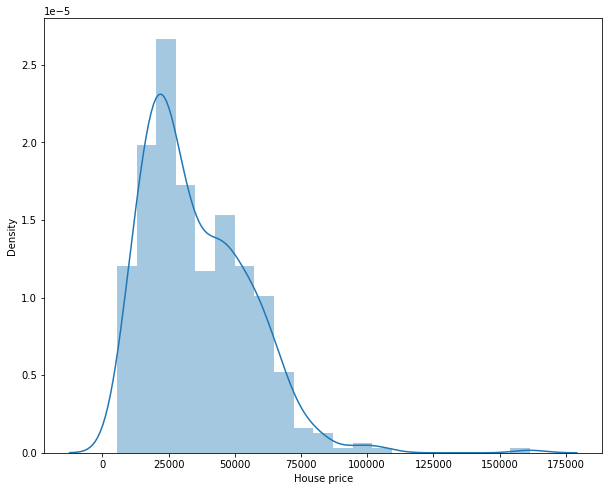

In [ ]:
# checking the distribution of dependent feature
plt.figure(figsize=(10,8))
sns.distplot(house_df['House price'])

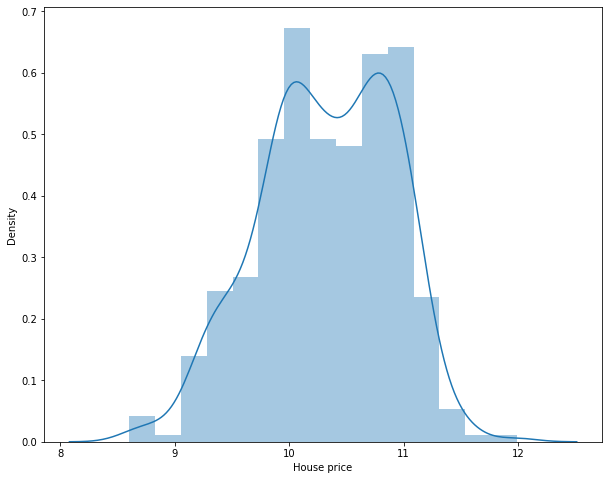

In [ ]:
# Distribution is positively skewed so applying log transformation to normalize it
plt.figure(figsize=(10,8))
sns.distplot(np.log(house_df['House price']))

In [ ]:
# Now it is normalized to some extent

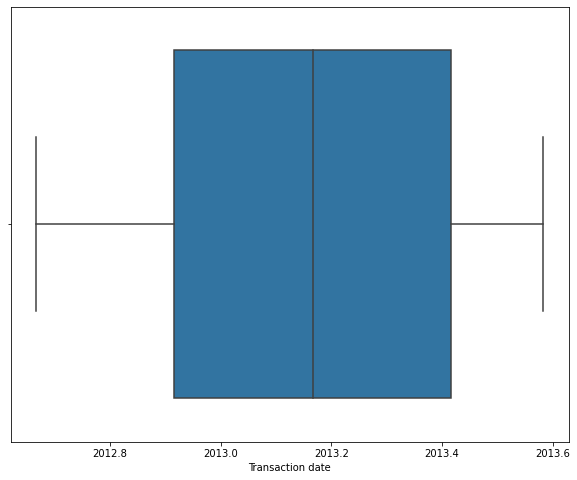

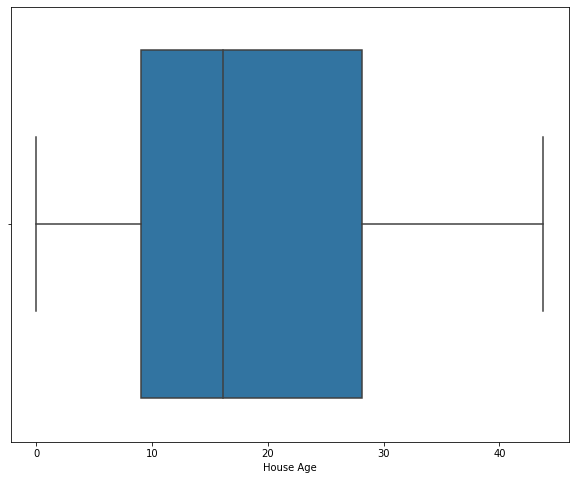

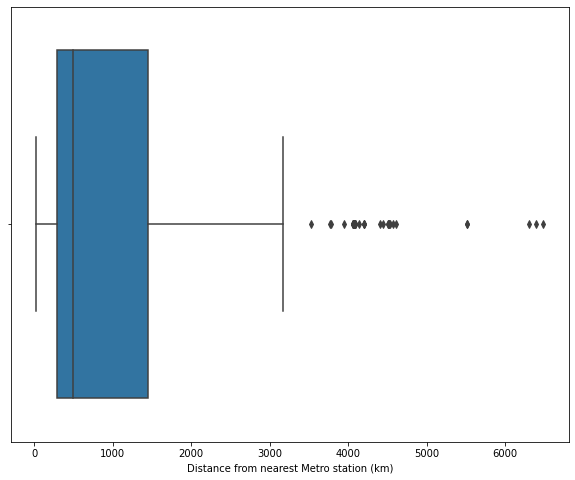

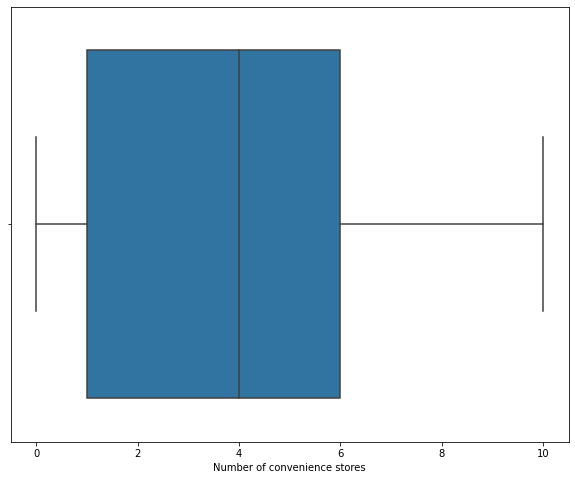

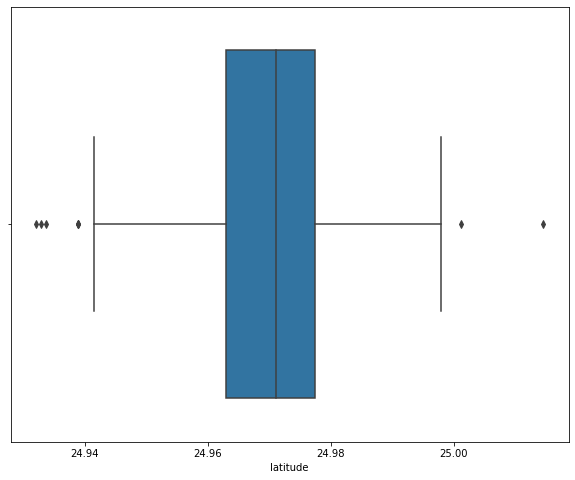

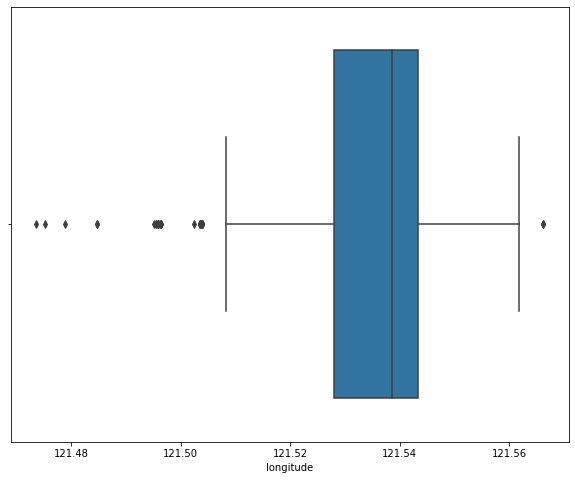

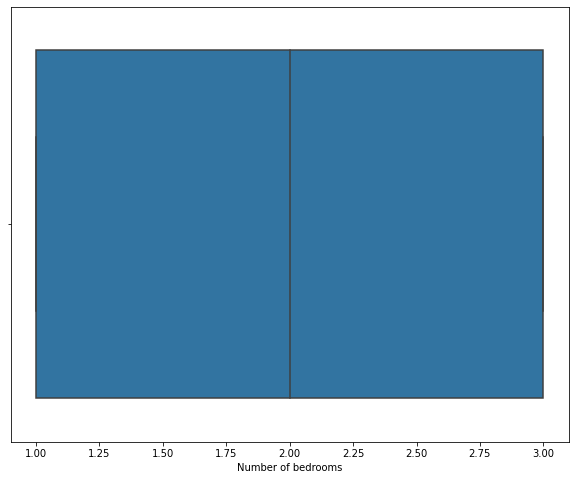

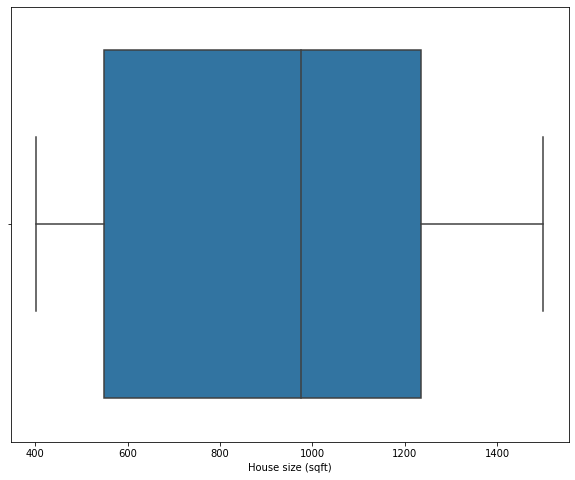

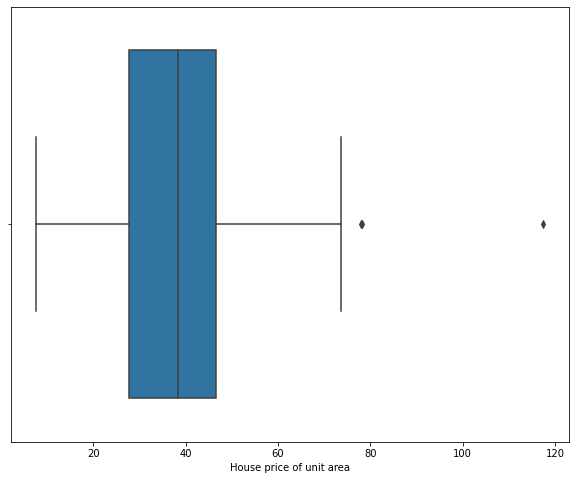

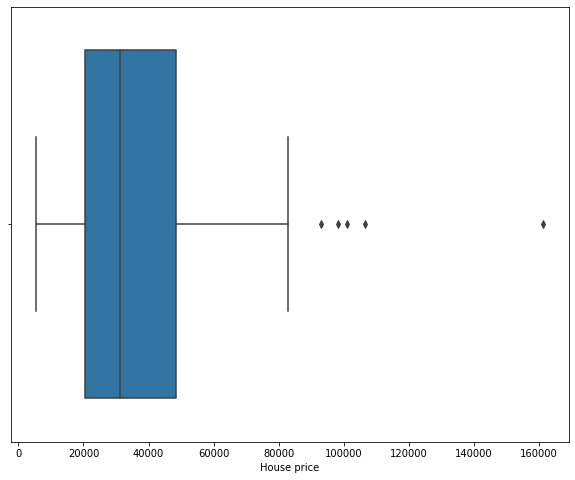

In [ ]:
for i in house_df.columns:
  plt.figure(figsize=(10,8))
  sns.boxplot(house_df[i])

In [ ]:
# There are not much outliers in the data

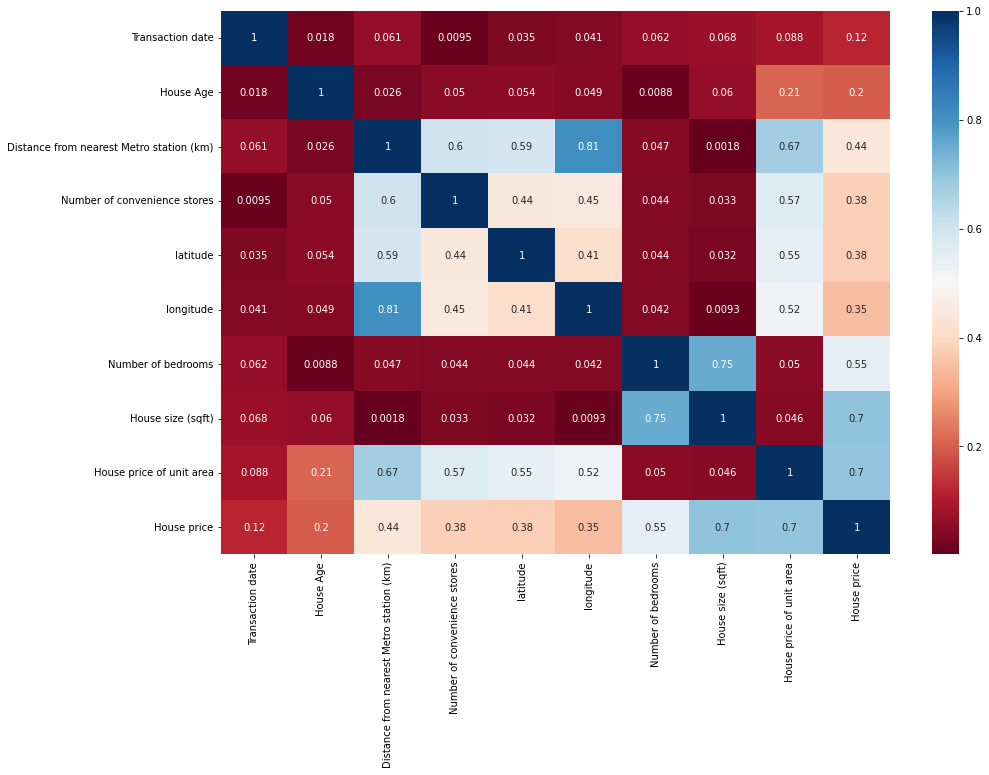

In [ ]:
# plotting heatmap to check the multicollinearity
plt.figure(figsize=(15,10))
correlation = house_df.corr()
sns.heatmap(abs(correlation),annot=True,cmap='RdBu')



*   Distance from nearest Metro station and longitude are highly correlated so dropping longitude column.
*   Number of bedrooms and House size are highly correlated so also dropping column number of bedrooms.
*   Dropping House prie of unit area as we have already taken House price
*   Latitude and Number of convenience store also showing correlation with Distance from metro station but taken these columns because they can be helpful in predicting the house price.





In [ ]:
house_df.drop(['longitude','Number of bedrooms','House price of unit area'],axis=1,inplace=True)

In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   House size (sqft)                         414 non-null    int64  
 6   House price                               414 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


# Implementing Different Regression Algorithms

In [ ]:
# takinf independent variables
X = house_df.drop(columns='House price')
# taking dependent variable
Y = house_df['House price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

*Implementing Linear Regression*

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)

In [ ]:
r2_score(y_train,train_pred)

0.731197939757842

In [ ]:
LR = r2_score(y_test,test_pred)
LR

0.8332753394240934

In [ ]:
# 83% r2 score with Linear Regression

*Implementing Polynomial Regression*

In [ ]:
poly = PolynomialFeatures()
poly_x_train = poly.fit_transform(x_train)
poly_x_test = poly.transform(x_test)

In [ ]:
lr.fit(poly_x_train,y_train)

LinearRegression()

In [ ]:
train_pred  = lr.predict(poly_x_train)
test_pred = lr.predict(poly_x_test)

In [ ]:
r2_score(y_train,train_pred)

0.8100888735863869

In [ ]:
Polynomial = r2_score(y_test,test_pred)
Polynomial

0.8504596765905141

In [ ]:
# 85% r2 score with Polynomial Regression

*Implementing Ridge and Lasso*

In [ ]:
lasso = Lasso(alpha=0.1,max_iter=2000)
lasso.fit(x_train,y_train)

Lasso(alpha=0.1, max_iter=2000)

In [ ]:
train_pred = lasso.predict(x_train)
test_pred = lasso.predict(x_test)

In [ ]:
r2_score(y_train,train_pred)

0.7311977159852061

In [ ]:
Lasso = r2_score(y_test,test_pred)
Lasso

0.8333359240559901

In [ ]:
# 83% r2 score with Lasso

In [ ]:
ridge = Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [ ]:
train_pred = ridge.predict(x_train)
test_pred = ridge.predict(x_test)

In [ ]:
r2_score(y_train,train_pred)

0.7178474062121085

In [ ]:
Ridge = r2_score(y_test,test_pred)
Ridge

0.8368146777804466

*Implementing Decision Tree*

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
train_pred = dt.predict(x_train)
test_pred = dt.predict(x_test)

In [ ]:
r2_score(y_train,train_pred)

1.0

In [ ]:
DT = r2_score(y_test,test_pred)
DT


0.7448076454720862

In [ ]:
# Decision tree ignoring many features, r2 score of test with decision tree is %

*Random Forest Implementation*

In [ ]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {'n_estimators':[100,150,200],
              'min_samples_leaf':[6,4,2],
              'max_depth' : [30,20,25],
              'min_samples_split': [30,25,20],
              }
random_forest = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,n_jobs=-1,cv=5)
random_forest.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [30, 20, 25],
                         'min_samples_leaf': [6, 4, 2],
                         'min_samples_split': [30, 25, 20],
                         'n_estimators': [100, 150, 200]})

In [ ]:
random_forest.best_estimator_

RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=20,
                      n_estimators=150)

In [ ]:
train_rf = random_forest.predict(x_train)
test_rf = random_forest.predict(x_test)

In [ ]:
r2_score(y_train,train_rf)

0.8749330582915631

In [ ]:
RF = r2_score(y_test,test_rf)
RF

0.8481593026578946

In [ ]:
# 85% r2 score with Random FOrest   

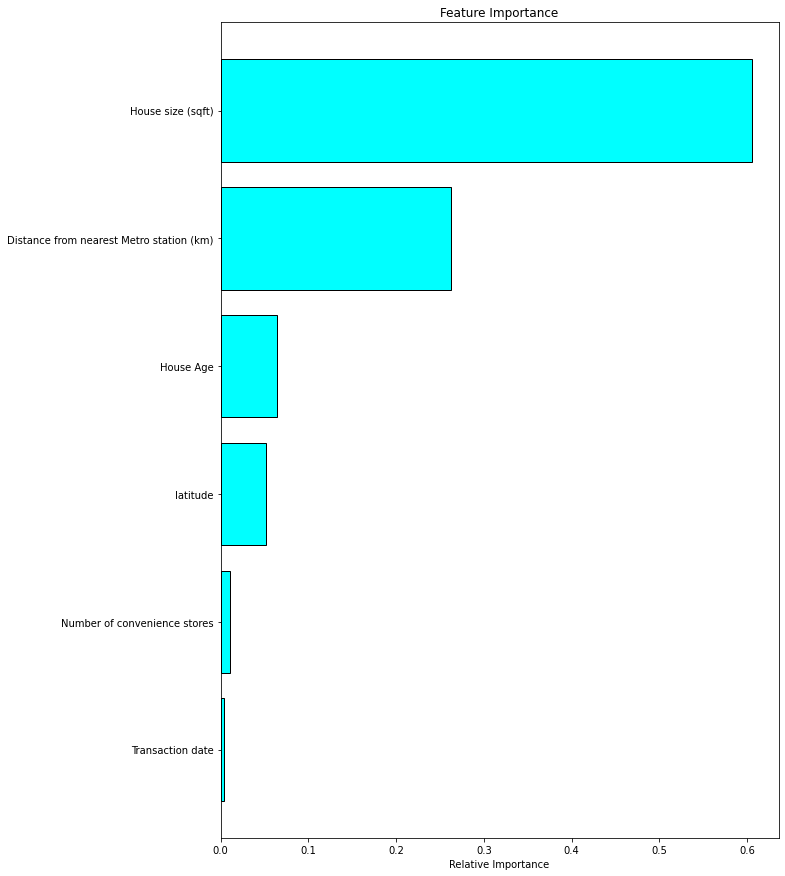

In [ ]:
# plotting feature importance
best =random_forest.best_estimator_
features = x_test.columns
importances = best.feature_importances_[0:8]
indices = np.argsort(importances)
plt.figure(figsize=(10,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='cyan',edgecolor='black' ,align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# We can see House size, Distance from nearest Metro Station, House Age and latiitude are most important features in predicting the price of the house.

* Accuracy Score with Different Algorithms*

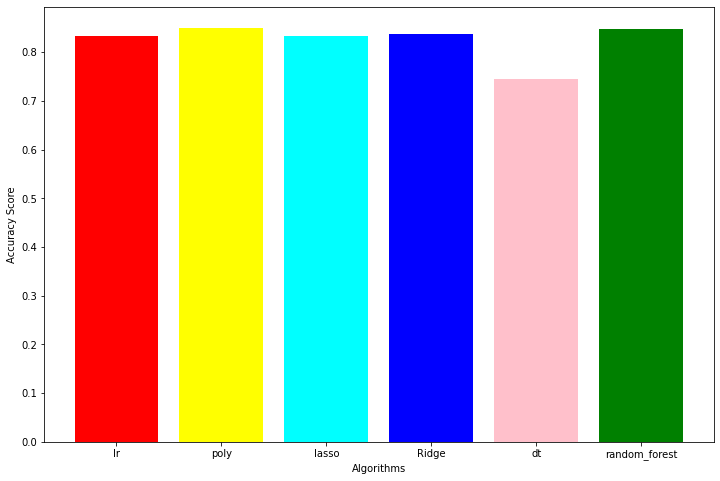

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(x=['lr','poly','lasso','Ridge','dt','random_forest'], height=[LR,Polynomial,Lasso,Ridge,DT,RF], color = ['red','yellow','cyan','blue','pink','green'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.show()

Random Forest is best fit for this dataset as it has train r squared score of approx 87 % and test r squared score of 85% approx.